In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# magic Jupyter function that allows plots to be interactive.
%matplotlib notebook

In [2]:
#Número de exemplos
M = 100

#Criação de vetor coluna com 1's
x0 = np.ones((M,1))

#Distribuição aleatória uniformemente distribuída de -5 a 5
x1 = 5*np.random.randn(M,1)
x2 = 5*np.random.randn(M,1)

#Distribuição aleatória Gaussiana, média 0 e variância 10
w = np.random.normal(0, 10, (M,1))

#Criação de labels
y = 3*x0 + 1.5*x1 + 2.3*x2*x2 + w

In [3]:
# Concatenate both column vectors.
X = np.c_[x0, x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x0 + a_opt[1, 0]*x1 + a_opt[2, 0]*x2*x2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

In [7]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.03
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.zeros((3,1))
a[0] = -10;
a[1] = -10;
a[2] = -10;

# Create vector for parameter history.
a_hist = np.zeros((3, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]
a_hist[2, 0] = a[2]

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((3, n_iterations))

#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    
    gradients = -2/M * X.T.dot(y - X.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    grad_hist[2, iteration] = gradients[2]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    a_hist[2, iteration+1] = a[2]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    iteration = iteration + 1

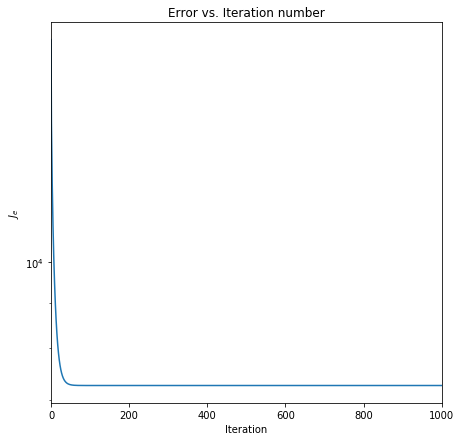

<Figure size 432x288 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [9]:
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))
print('a2_opt: ' + str(a_opt[2, 0]))

print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))
print('a2_gd: ' + str(a[2, 0]))

a1_opt: 71.37453107688425
a2_opt: 3.262636896832518
a2_opt: -5.184140093247399
a1_gd: 71.3745310768842
a2_gd: 3.26263689683252
a2_gd: -5.184140093247402
